In [641]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 
import seaborn as sns 
sns.set_style('darkgrid')
from matplotlib import style
%matplotlib inline
from statistics import mean


# ML 

%pip install scikit-learn  --upgrade --force
%pip install xgboost
%pip install lightgbm

from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score # use for classicfictation score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, train_test_split, StratifiedKFold, GroupKFold, StratifiedGroupKFold)

import lightgbm as lgb


df01= pd.read_csv("MasterCapStoneFile_01.csv" )

#check for NULL values
df01.isnull().sum()




  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: scikit-learn
    Found existing

HD_M_Value      0
HD_M_US         0
HD_M_REL_US     0
HBP_M_Value     0
HBP_M_US        0
HBP_M_REL_US    0
HC_M_Value      0
HC_M_US         0
HC_M_REL_US     0
OB_M_Value      0
OB_M_US         0
OB_M_REL_US     0
DB_M_Value      0
DB_M_US         0
DB_M_REL_US     0
Target_Value    0
dtype: int64

Histrograms =  show the frequency of distribution. 

## ML 

##### Dividing the dataset into independent and dependent features.

In [642]:
df_01 = df01.drop(columns=[ 'HD_M_US', 'HD_M_REL_US',  'HBP_M_US','HBP_M_REL_US',  'HC_M_US', 'HC_M_REL_US', 
'OB_M_US', 'OB_M_REL_US',  'DB_M_US', 'DB_M_REL_US'])

#### Below is the dataframe for the ML models:

In [643]:
# Removing outliers by query for the values to keep

df = df_01.query("`OB_M_Value` >=0 & `OB_M_Value` <50 & \
                  `DB_M_Value` >0 & `DB_M_Value` <19  & \
                  `HD_M_Value` <9  & `HD_M_Value` >1  & \
                  `HBP_M_Value` >13 & `HBP_M_Value` <45 & \
                  `HC_M_Value` >22 & `HC_M_Value` <41  & \
                  `Target_Value` >1 & `Target_Value` < 5" )
#print(df)

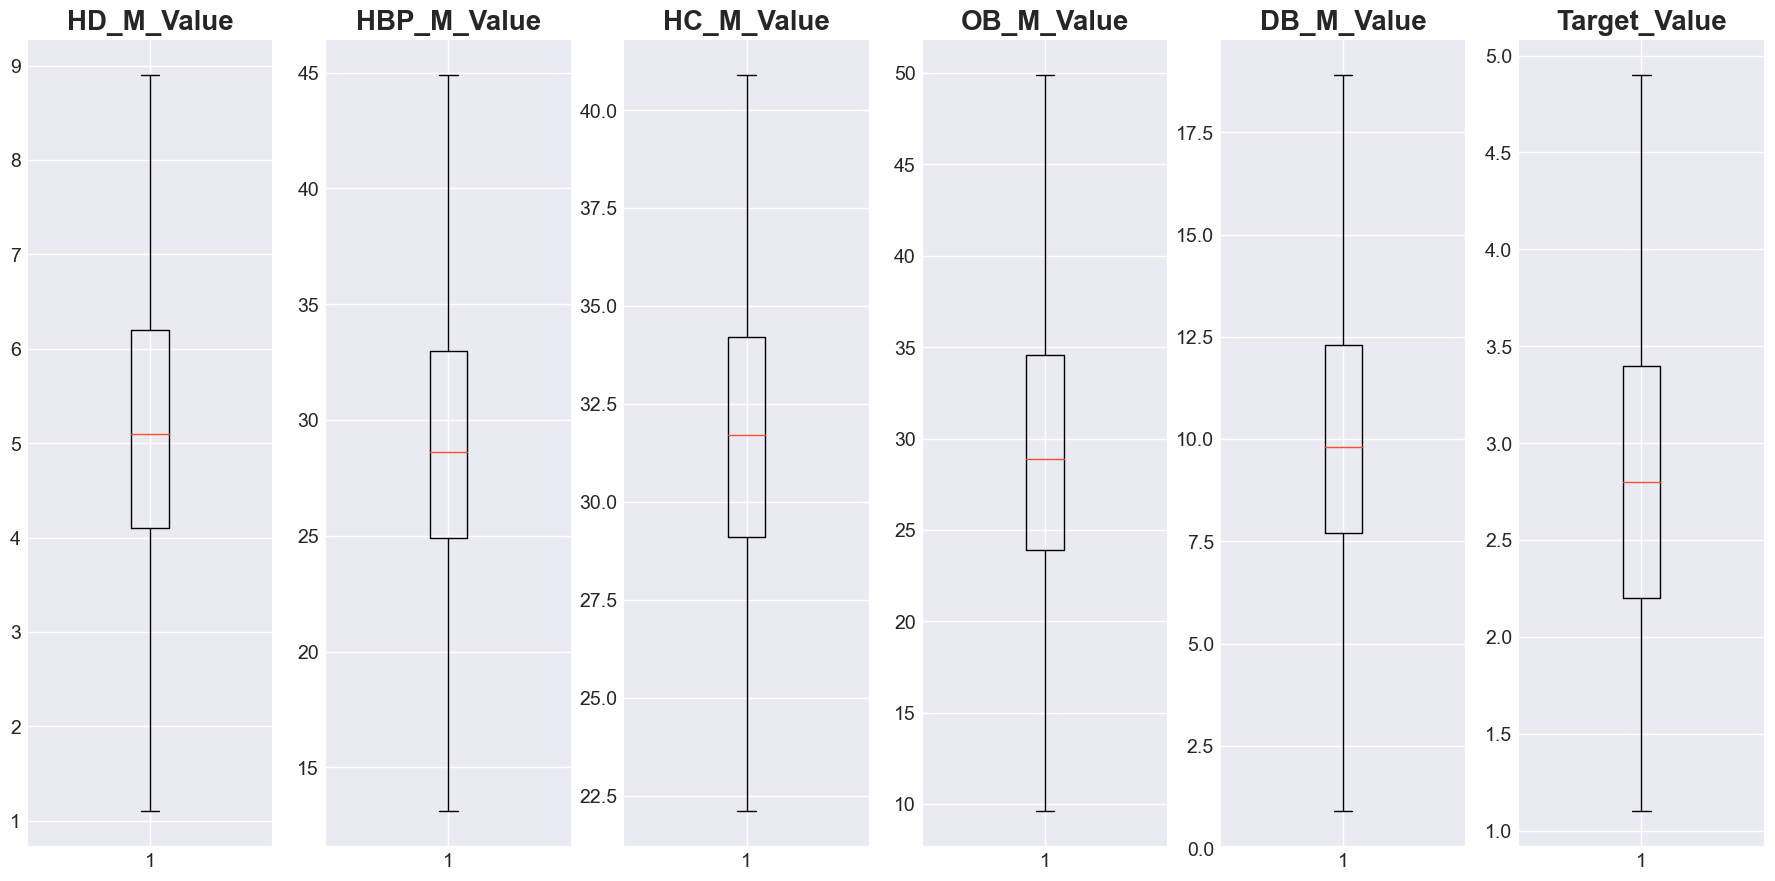

In [644]:
#Subplot after outliers are dropped.

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle) # exclude row#0 and #1
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()

In [645]:
df

,HD_M_Value,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value,Target_Value
0,4.2,32.3,34.1,30.3,12.2,3.4
2,5.8,33.8,36.7,17.3,9.9,3.1
3,4.4,27.4,27.1,22.1,14.7,2.0
5,3.5,24.4,27.5,25.3,11.4,2.6
6,5.5,28.1,33.7,22.5,3.4,2.9
...,...,...,...,...,...,...
27205,3.3,20.8,27.6,33.8,11.9,1.3
27206,4.9,32.5,30.7,33.0,7.4,3.1
27207,6.7,31.3,28.0,33.9,10.3,4.5
27208,5.2,31.9,34.1,29.7,16.4,4.9


ML Analysis - LinearRegression Model

In [646]:
X=df.iloc[:, :-1] # Independent features.
y=df.iloc[:, -1]  # dependent feature (Stroke).

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [647]:
X

,HD_M_Value,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value
0,4.2,32.3,34.1,30.3,12.2
2,5.8,33.8,36.7,17.3,9.9
3,4.4,27.4,27.1,22.1,14.7
5,3.5,24.4,27.5,25.3,11.4
6,5.5,28.1,33.7,22.5,3.4
...,...,...,...,...,...
27205,3.3,20.8,27.6,33.8,11.9
27206,4.9,32.5,30.7,33.0,7.4
27207,6.7,31.3,28.0,33.9,10.3
27208,5.2,31.9,34.1,29.7,16.4


ML Analyzing using - Linear Regression Model.

In [648]:
# Fit/load into a model

modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)
#y_test

LinearRegression()

In [649]:
#Predict on training set.
score_train = modelReg.predict(X_train)
print(f"Predicted on training set:\n{score_train}")

Predicted on training set:
[2.66441637 2.89940316 2.81122485 ... 2.74409895 2.77586266 2.78140954]


In [650]:
#Predict on Testing set.
# See the performance (diff of actual value(y_test) from predicted X_test)

y_pred = modelReg.predict(X_test)  # predict y on X.


Predicted Values save to df - Linear Regression 

In [651]:
# Creating new df for the results
pred_y_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_df[0:5]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
1664,3.4,2.774551,0.625449,0.391186,18.395548
8305,3.1,2.832227,0.267773,0.071702,8.637843
17788,3.2,2.800212,0.399788,0.159830,12.493377
12519,2.1,3.004073,0.904073,0.817348,43.051092
24634,3.3,2.897191,0.402809,0.162255,12.206335


In [652]:
#print(modelReg.score(X_test,y_test))
#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print('MAE = ', mean_absolute_error(y_pred,y_test))
#print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

#==============================================================
Tot_Err = pred_y_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

Score 0.013883862179828066
r2:-106.09821607117235  
MAE =  0.6845215621752261
MAD =  0.6845215621752261
MSE =  0.7138371966002942
MAPE =  27.26118997065989


In [653]:
#model_ranks=pd.Series(modelReg.feature_importances_,index=X_train.columns,name='Importance')
#ax=model_ranks.plot(kind='barh')

## K-Fold CV on Linear Regression 

In [654]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelReg, X_train,y_train, scoring='r2', cv=10)
scores
#print(np.mean(scores))

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.01 accuracy with a standard deviation of 0.01


In [655]:
# printing the scores on the test dataset.
from sklearn.model_selection import cross_val_predict
pred_values = cross_val_predict(modelReg, X_test,y_test)
print('Predicted values:', pred_values)

#  Test - 10 fold CV on the test data.
scores_test = cross_val_score(modelReg, X_test, y_test, cv=10)
print('Accuracy on testing values:', scores_test)


Predicted values: [2.79071895 2.89552847 2.72434183 ... 3.04642623 2.98591907 2.79091995]
Accuracy on testing values: [-0.00592722  0.00299206  0.01046008  0.02411976  0.03211956  0.01059337
  0.01227562  0.02956148  0.01524361 -0.01441626]


In [656]:
print(np.mean(scores_test))

0.011702205646476449


XGBRegessor ML Model

In [657]:
#modelReg = LinearRegression ()
modelXGB= XGBRegressor()
modelXGB.fit(X_train,y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [658]:
#Predict on training set.
score_train = modelXGB.predict(X_train)
print(f"predicted response:\n{score_train}")

predicted response:
[2.542386  2.5961916 2.5707643 ... 2.3073168 2.7879899 2.137996 ]


In [659]:
#Predict on Testing set.
y_pred = modelXGB.predict(X_test)


In [660]:

#-=================
# Creating new df - holding values for Decision Tree

pred_y_XGB_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_XGB_df [0:5]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
1664,3.4,2.649021,0.750979,0.563970,22.087627
8305,3.1,2.810361,0.289639,0.083891,9.343204
17788,3.2,2.838876,0.361124,0.130411,11.285125
12519,2.1,2.626641,0.526641,0.277351,25.078156
24634,3.3,3.032480,0.267520,0.071567,8.106681


In [661]:

print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

#print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



#==============================================================
Tot_Err = pred_y_XGB_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_XGB_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_XGB_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
#Tot_Percentage_Err = pred_y_XGB_df['Percentage_Err'].sum()
#print('MAPE = ', Tot_Percentage_Err / Tot_Err)

from sklearn.metrics import mean_squared_error

#print('MSE = ', mean_squared_error(pred_y_XGB_df['Actual Stroke Value'], pred_y_XGB_df['Predicted Value'] ) )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
print("SSE = ", pred_y_XGB_df['Sqr'].sum())

Score -0.08343828359092642
r2:-9.568624546511217  
mae:0.7148567431009611  
MAPE =  0.2541842908520739
MAD =  0.7148567431009611
MSE =  0.7842874864187837
SSE =  2864.217900401398


## K-Fold CV on XGBRegessor ML Model

In [662]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelXGB, X_train,y_train, scoring='r2', cv=10)

print(np.mean(scores))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.10139822623250386
-0.10 accuracy with a standard deviation of 0.02


ML Analyzing using - Decision Tree Model.

In [663]:


modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)



DecisionTreeRegressor()

In [664]:
#Predict on training set.
score_train = modelDT.predict(X_train)
print(f"predicted response:\n{score_train}")

predicted response:
[2.6 1.6 3.  ... 2.5 2.4 2.3]


In [665]:
y_pred = modelDT.predict(X_test) # Predicting X(all factors).
modelDT.score(X_test,y_test) # The performance.

-1.0751484782808762

In [666]:
# Creating new df - holding values for Decision Tree

pred_y_DT_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_DT_df[0:5]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
1664,3.4,2.3,1.1,1.21,32.352941
8305,3.1,2.2,0.9,0.81,29.032258
17788,3.2,1.9,1.3,1.69,40.625000
12519,2.1,2.6,0.5,0.25,23.809524
24634,3.3,2.9,0.4,0.16,12.121212


In [667]:
print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

#print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
#print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



#==============================================================
Tot_Err = pred_y_DT_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_DT_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_DT_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_DT_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
print("SSE = ", pred_y_DT_df['Sqr'].sum())


Score -1.0751484782808762
r2:-0.8872676884885562  
mae:0.9828587075575027  
MAD =  0.9828587075575027
MSE =  1.5021741511500546
MAPE =  38.26274552956472
SSE =  5485.94


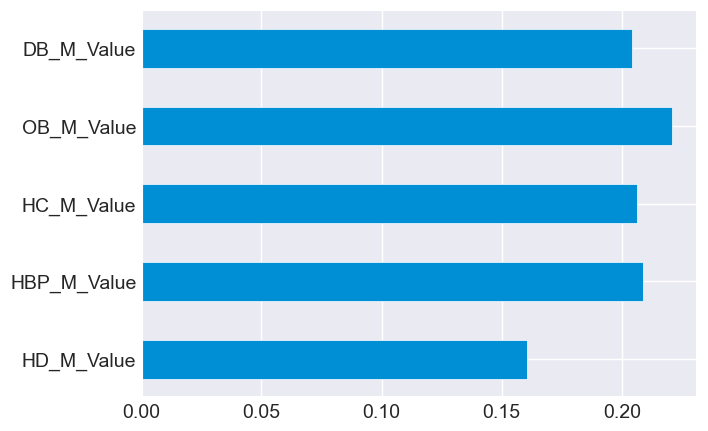

In [668]:
model_ranks=pd.Series(modelDT.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

K-Fold on DecisionTree

In [669]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelDT, X_train,y_train, scoring='r2', cv=10)
scores
#print(np.mean(scores))

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-1.09 accuracy with a standard deviation of 0.09


#### ML Analyzing using - RandomForestRegressor Model.

In [670]:


modelRF = RandomForestRegressor(n_estimators=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
modelRF.fit(X_train,y_train)




RandomForestRegressor(n_estimators=20, random_state=1)

In [671]:
#Predict on training set.
score_train = modelRF.predict(X_train)
print(f"predicted Training Score response:\n{score_train}")

predicted Training Score response:
[2.345 1.98  2.555 ... 2.2   3.825 2.855]


In [672]:
#Predict on testing set.
y_pred = modelRF.predict(X_test)


In [673]:

pred_y_RF_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_RF_df[0:5]

,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
9533,2.6,3.095,0.495,0.245025,19.038462
3435,2.5,2.505,0.005,0.000025,0.200000
7491,3.0,2.610,0.390,0.152100,13.000000
15267,3.4,2.895,0.505,0.255025,14.852941
25705,3.3,3.165,0.135,0.018225,4.090909


In [674]:

print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print('MSE', mean_squared_error(y_test,y_pred))

#==============================================================
Tot_Err = pred_y_RF_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_RF_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
#Tot_Sum_Sqr = Sum_Sqr = pred_y_RF_df['Sqr'].sum()
#print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
#Tot_Percentage_Err = pred_y_RF_df['Percentage_Err'].sum()
#print('MAPE = ', Tot_Percentage_Err / Tot_Err)

Score -0.10581618728988285
r2:-8.555913401478014  
MAE =  0.7080052026286967
MAPE =  0.24966537860415
MSE 0.7733356859255203
MAD =  0.7080052026286967


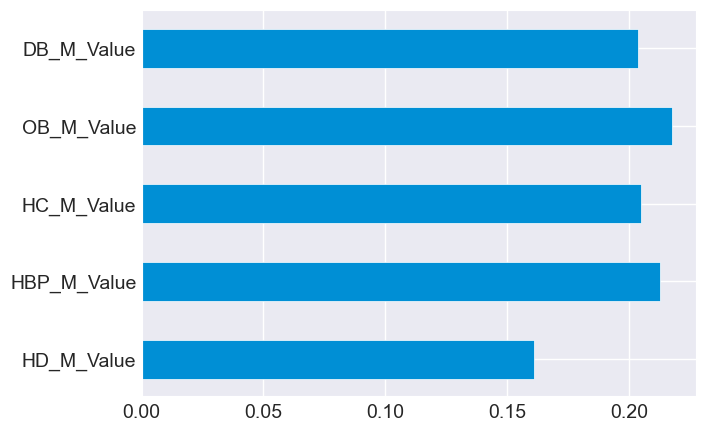

In [675]:
model_ranks=pd.Series(modelRF.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

### Cross Validation of all models

## k-fold CV  for all models

In [676]:
from sklearn.model_selection import cross_val_score
X=df
y=df.iloc[:, -1]  # dependent feature (Stroke).

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=True)

#modelReg = LinearRegression ()
#modelXGB= XGBRegressor()
#modelDT= DecisionTreeRegressor()
#modelRF = RandomForestRegressor(n_estimators=20, random_state=1)

In [677]:
All_Modles = []
All_Modles.append(('Linear Reg', LinearRegression ()))
All_Modles.append (('XGBRegessor', XGBRegressor()))
All_Modles.append(('DecisionTree', DecisionTreeRegressor()))
All_Modles.append(('RandomForest', RandomForestRegressor()))
print(All_Modles)

[('Linear Reg', LinearRegression()), ('XGBRegessor', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)), ('DecisionTree', DecisionTreeRegressor()), ('RandomForest', RandomForestRegressor())]


In [678]:
results = dict()
for name, CV_Modles in All_Modles:
    kfold = KFold(n_splits=10, random_state=None)
    scores = cross_val_score(CV_Modles, X_train,y_train, scoring='r2', cv=10)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    
print()

1.00 accuracy with a standard deviation of 0.00
1.00 accuracy with a standard deviation of 0.00
1.00 accuracy with a standard deviation of 0.00
1.00 accuracy with a standard deviation of 0.00

